In [217]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [218]:
#Leer Ficheros
request_df_2 = pd.read_csv("//home/biomedmax/github/project-1-ironhack-payments-es/project_dataset/filtered_cash")
fees_df_2 = pd.read_csv("//home/biomedmax/github/project-1-ironhack-payments-es/project_dataset/filtered_fees")

In [219]:
#Hay que hacerlo otra vez porque esto por los vistos no se guarda...

#Crear una copia de mi DF de pagos y transformar todas las columnas a fechas (las que son fechas)
request_df_2 = request_df_2.copy()

request_df_2['created_at'] = pd.to_datetime(request_df_2['created_at'])
request_df_2['updated_at'] = pd.to_datetime(request_df_2['updated_at'])
request_df_2['moderated_at'] = pd.to_datetime(request_df_2['moderated_at'], errors="coerce")
request_df_2['reimbursement_date'] = pd.to_datetime(request_df_2['reimbursement_date'], errors="coerce")
request_df_2['cash_request_received_date'] = pd.to_datetime(request_df_2['cash_request_received_date'], errors="coerce")
request_df_2['money_back_date'] = pd.to_datetime(request_df_2['money_back_date'], errors="coerce")
request_df_2['send_at'] = pd.to_datetime(request_df_2['send_at'], errors="coerce")
request_df_2['send_at'] = pd.to_datetime(request_df_2['send_at'], errors="coerce")
request_df_2['reco_creation'] = pd.to_datetime(request_df_2['reco_creation'], errors="coerce")
request_df_2['reco_last_update'] = pd.to_datetime(request_df_2['reco_last_update'], errors="coerce")

#Rellenar los NaNs de user ID con los valores de "Deleted Account ID"
request_df_2['user_id'] = request_df_2['user_id'].fillna(request_df_2["deleted_account_id"])

#Convertir los ID a Integers
request_df_2['user_id'] = request_df_2["user_id"].astype("int")

In [220]:
request_df_2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   Unnamed: 0                  23970 non-null  int64              
 1   id                          23970 non-null  int64              
 2   amount                      23970 non-null  float64            
 3   status                      23970 non-null  object             
 4   created_at                  23970 non-null  datetime64[ns, UTC]
 5   updated_at                  23970 non-null  datetime64[ns, UTC]
 6   user_id                     23970 non-null  int64              
 7   moderated_at                15912 non-null  datetime64[ns, UTC]
 8   deleted_account_id          2104 non-null   float64            
 9   reimbursement_date          3050 non-null   datetime64[ns, UTC]
 10  cash_request_received_date  16289 non-null  datetime64[ns]

In [221]:
#Crear los Cohortes por mes, meterla en la columna "Cohort De Verdad"
request_df_2["cohort_de_verdad"] = request_df_2.groupby("user_id")["created_at"].transform("min").dt.to_period("M")

request_df_2

/tmp/ipykernel_742/3966957515.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  request_df_2["cohort_de_verdad"] = request_df_2.groupby("user_id")["created_at"].transform("min").dt.to_period("M")


,Unnamed: 0,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,cohort_de_verdad
0,7920,3,1.0,canceled,2019-11-19 13:57:53.511561+00:00,2020-12-14 10:25:57.710844+00:00,47,NaT,NaN,NaT,NaT,NaT,regular,NaT,NaN,NaT,NaT,2019-11
1,7260,4,100.0,money_back,2019-12-09 14:47:35.190714+00:00,2020-11-04 12:54:52.120014+00:00,1309,NaT,1309.0,NaT,NaT,NaT,regular,NaT,NaN,NaT,NaT,2019-12
2,0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.407830+00:00,804,2019-12-11 16:47:42.405646+00:00,NaN,2020-01-09 19:05:21.596363+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT,2019-12
3,10030,6,100.0,direct_debit_rejected,2019-12-10 19:05:48.921042+00:00,2020-12-18 22:47:47.993817+00:00,812,NaT,NaN,NaT,2019-12-11,NaT,regular,NaT,pending,2020-03-20 14:12:53.208246+00:00,2020-12-18 22:47:48.008850+00:00,2019-12
4,2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00:00,191,2019-12-11 09:46:59.777728+00:00,NaN,2020-01-09 19:13:35.825041+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT,2019-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23965,18223,27006,50.0,money_back,2020-11-01 23:07:55.231487+00:00,2020-12-18 13:11:35.051472+00:00,55916,NaT,NaN,NaT,2020-11-02,2020-11-12 19:39:20.241980+00:00,instant,2020-11-01 23:08:07.414160+00:00,NaN,NaT,NaT,2020-09
23966,21919,27007,100.0,money_back,2020-11-01 23:11:37.788849+00:00,2020-12-18 13:13:10.258884+00:00,39339,NaT,NaN,NaT,2020-11-02,2020-11-29 19:27:43.055298+00:00,instant,2020-11-01 23:12:16.335916+00:00,NaN,NaT,NaT,2020-09
23967,7088,27008,50.0,rejected,2020-11-01 23:13:19.286745+00:00,2020-11-02 09:06:37.169489+00:00,24505,2020-11-02 09:06:37.162733+00:00,NaN,NaT,NaT,NaT,instant,2020-11-01 23:13:28.791529+00:00,NaN,NaT,NaT,2020-07
23968,14725,27009,60.0,money_back,2020-11-01 23:15:28.102894+00:00,2020-12-18 13:10:18.004190+00:00,100781,NaT,NaN,NaT,NaT,2020-12-02 14:17:37.433540+00:00,instant,2020-11-01 23:16:12.720278+00:00,NaN,NaT,NaT,2020-11


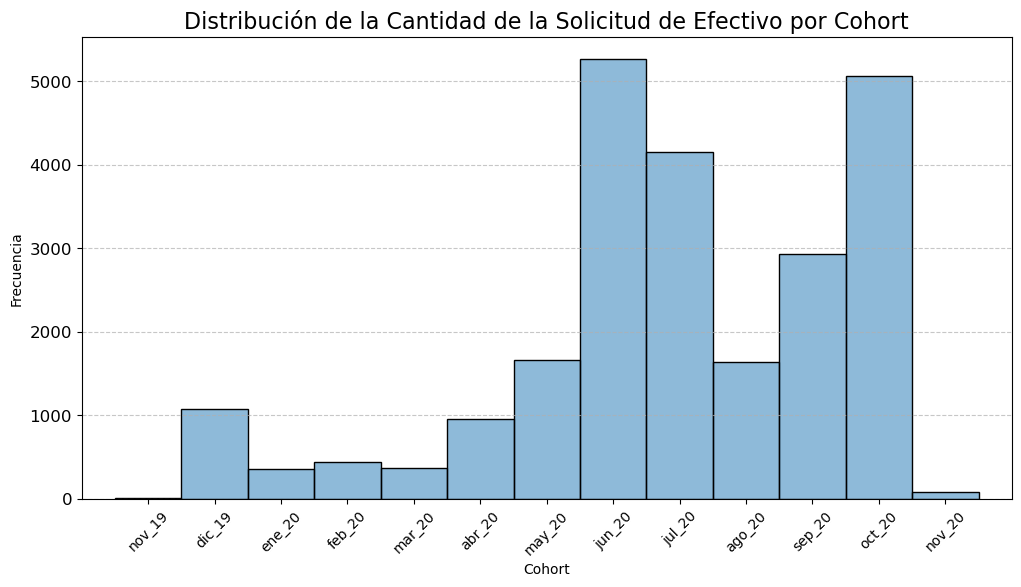

<Figure size 800x400 with 0 Axes>

In [222]:
# Histogramas

meses_espanol = [

    "nov_19",

    "dic_19",

    "ene_20",

    "feb_20",

    "mar_20",

    "abr_20",

    "may_20",

    "jun_20",

    "jul_20",

    "ago_20",

    "sep_20",

    "oct_20",

    "nov_20"
]

plt.figure(figsize=(12, 6))

request_df_2['cohort_de_verdad'] = request_df_2['cohort_de_verdad'].astype(str)

sns.histplot(request_df_2['cohort_de_verdad'], alpha=0.5)

plt.title('Distribución de la Cantidad de la Solicitud de Efectivo por Cohort', fontsize=16)

plt.xlabel('Cohort')

plt.ylabel('Frecuencia')

plt.yticks(fontsize=12)

plt.xticks(ticks=range(13), labels=meses_espanol, rotation=45)

plt.xlim(-1, 13)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.figure(figsize=(8,4), tight_layout=True)


plt.show()

In [223]:
transfer_counts = request_df_2.groupby(["cohort_de_verdad", "transfer_type"]).size().unstack(fill_value=0)

transfer_counts

transfer_type,instant,regular
cohort_de_verdad,,
2019-11,4,4
2019-12,170,910
2020-01,60,294
2020-02,84,357
2020-03,80,291
2020-04,207,745
2020-05,496,1164
2020-06,1924,3342
2020-07,2016,2131


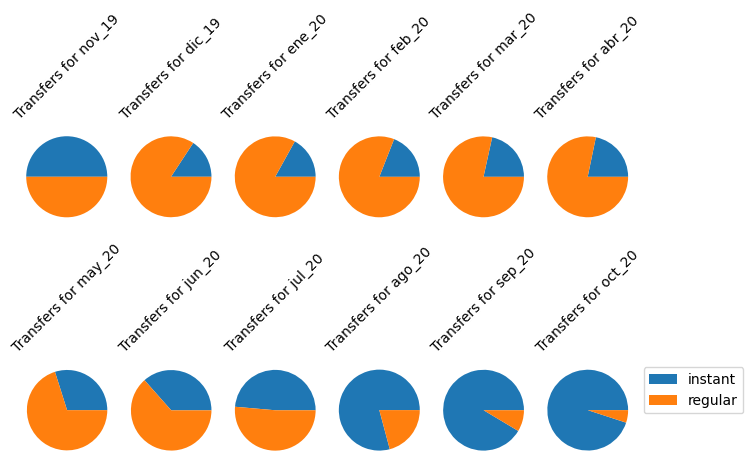

In [224]:
#Crear un Pie Chart que dice la proporcion de cash instantaneo VS regular para cada uno de los cohortes

fig, axs = plt.subplots(nrows=2, ncols=6)

# Iterate over each row in transfer_counts DataFrame
for i, (idx, row) in enumerate(transfer_counts.iterrows()):
    if i<=5:
        # Plot a pie chart as a subplot for each row
        axs[0,i].pie(row)

        # Equal aspect ratio ensures that pie is drawn as a circle.
        axs[0,i].axis('equal') 

        # Add a title with the month_cohort value
        axs[0,i].set_title(f"Transfers for {meses_espanol[i]}", size=10, rotation = 45)

    if i>5 and i<12:
        j=i-6
        axs[1,j].pie(row)

        axs[1,j].axis('equal') 
        
        axs[1,j].set_title(f"Transfers for {meses_espanol[i]}", size=10, rotation = 45)


    

# Adjust layout to prevent overlapping
plt.tight_layout()

#plt.legend(["instant", "regular"],  loc='best')
plt.legend(["instant", "regular"], bbox_to_anchor=(1.05, 1), loc='upper left')


# Show the pie chart
plt.show()

<AxesSubplot:xlabel='cohort_de_verdad'>

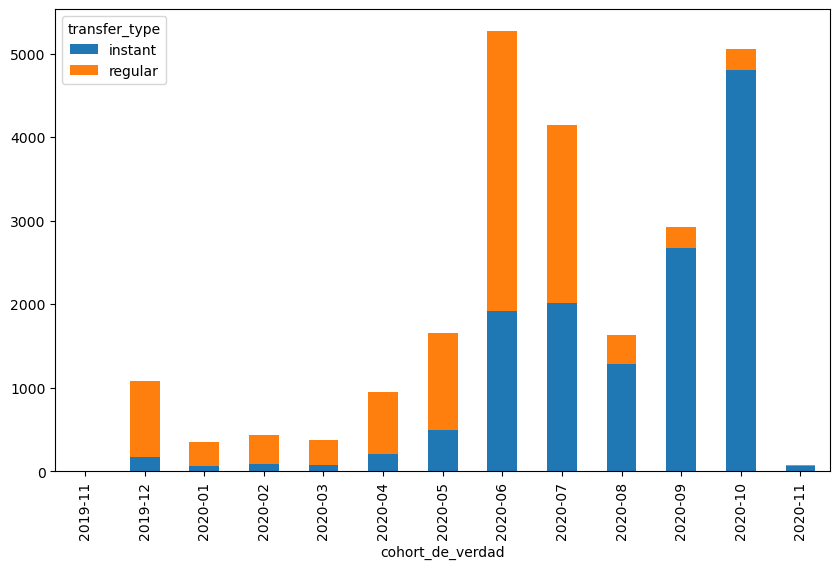

In [225]:
#Barchart indicando cuales de los cohortes han solicitado instant y regular transfer types
transfer_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

In [226]:
#Crear una DataFrame nueva, agrupada por Month Cohort Y Cash Request data. Cada una de las agrupaciones tendra la cuenta de las veces que aparecen.
request_df_3 = request_df_2.groupby(["cohort_de_verdad", "cash_request_received_date"]).count()
request_df_3

Unnamed: 0  id  amount  status  \
cohort_de_verdad cash_request_received_date                                   
2019-11          2020-04-17                           1   1       1       1   
                 2020-05-18                           1   1       1       1   
                 2020-08-05                           1   1       1       1   
                 2020-09-23                           1   1       1       1   
                 2020-10-15                           1   1       1       1   
...                                                 ...  ..     ...     ...   
2020-11          2020-11-02                          17  17      17      17   
                 2020-11-03                          35  35      35      35   
                 2020-11-04                           2   2       2       2   
                 2020-11-09                           4   4       4       4   
                 2020-11-11                           1   1       1       1   

                                             created_at  updated_at  user_id  \
cohort_de_verdad cash_request_received_date                                    
2019-11          2020-04-17                           1           1        1   
                 2020-05-18                           1           1        1   
                 2020-08-05                           1           1        1   
                 2020-09-23                           1           1        1   
                 2020-10-15                           1           1        1   
...                                                 ...         ...      ...   
2020-11          2020-11-02                          17          17       17   
                 2020-11-03                          35          35       35   
                 2020-11-04                           2           2        2   
                 2020-11-09                           4           4        4   
                 2020-11-11                           1           1        1   

                                             moderated_at  deleted_account_id  \
cohort_de_verdad cash_request_received_date                                     
2019-11          2020-04-17                             1                   0   
                 2020-05-18                             0                   0   
                 2020-08-05                             0                   0   
                 2020-09-23                             1                   0   
                 2020-10-15                             0                   0   
...                                                   ...                 ...   
2020-11          2020-11-02                             0                   0   
                 2020-11-03                             0                   0   
                 2020-11-04                             0                   0   
                 2020-11-09                             0                   0   
                 2020-11-11                             0                   0   

                                             reimbursement_date  \
cohort_de_verdad cash_request_received_date                       
2019-11          2020-04-17                                   1   
                 2020-05-18                                   0   
                 2020-08-05                                   0   
                 2020-09-23                                   1   
                 2020-10-15                                   0   
...                                                         ...   
2020-11          2020-11-02                                   4   
                 2020-11-03                                  10   
                 2020-11-04                                   1   
                 2020-11-09                                   3   
                 2020-11-11                                   1   

                                             money

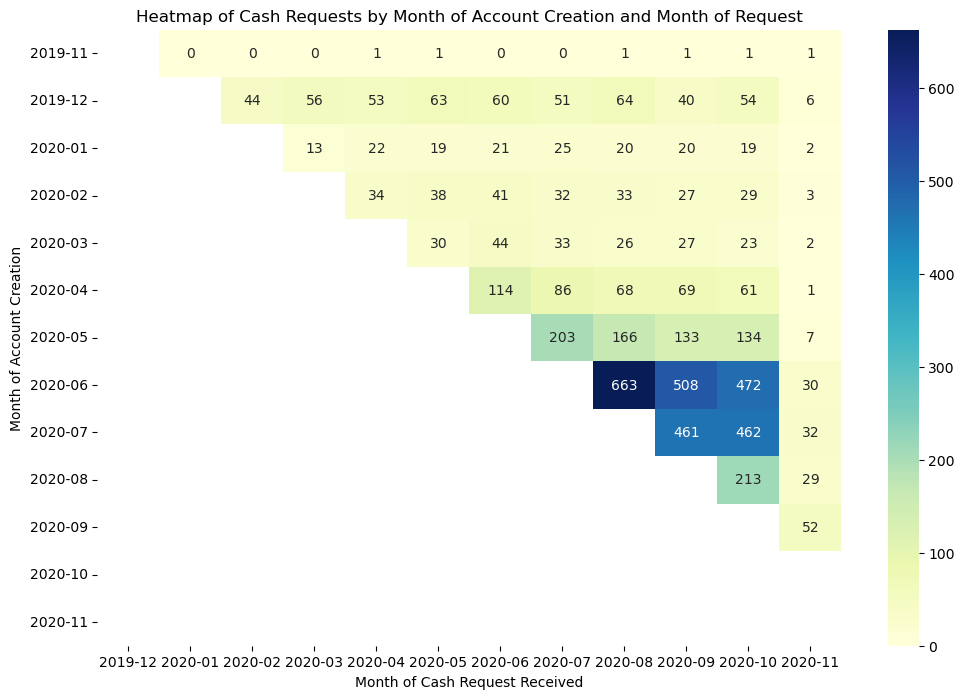

In [227]:
#Crear un heat map de cuantos Cash Requests hubo en cada mes, por cada uno de los cohortes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Aqui convertimos la columna de "cash_request_received_date" a meses en vez de dias
request_df_2["cash_request_received_date"] = request_df_2["cash_request_received_date"].dt.to_period("M")

# Group by month_cohort and cash_request_received_month and count the occurrences
heatmap_data = request_df_2.groupby(['cohort_de_verdad', 'cash_request_received_date']).size().unstack(fill_value=0)

mask = np.tril(np.ones_like(heatmap_data, dtype=bool))


# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu", mask=mask)
plt.title('Heatmap of Cash Requests by Month of Account Creation and Month of Request')
plt.xlabel('Month of Cash Request Received')
plt.ylabel('Month of Account Creation')
plt.show()

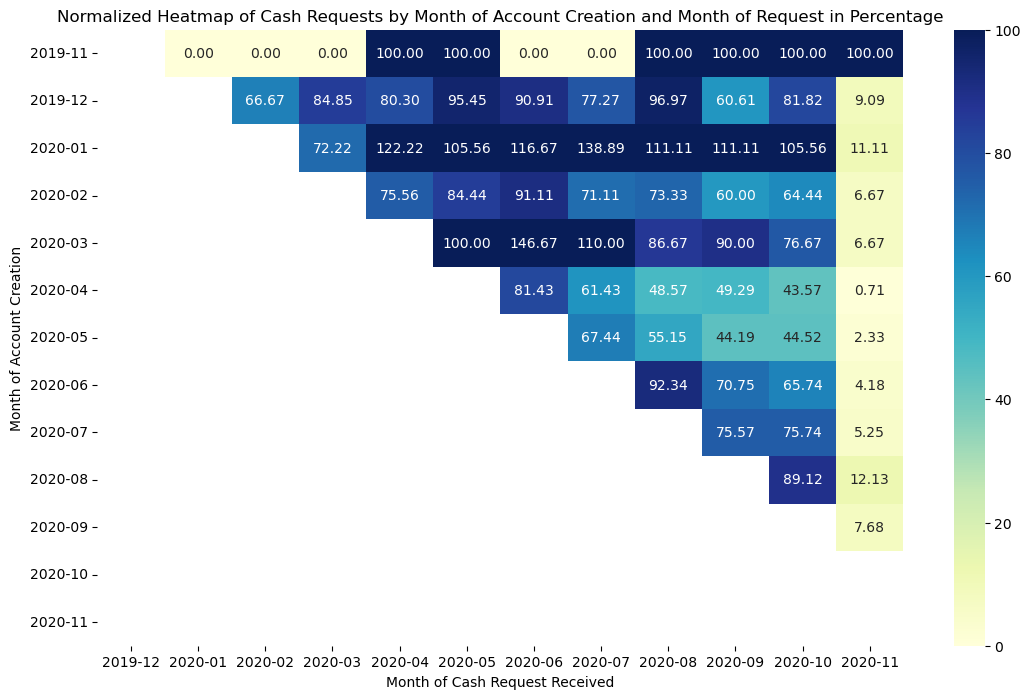

In [232]:
# Normalize the data to make each value on the diagonal 100% and calculate percentages relative to the first value in each row
diagonal_values = [  1,  66,  18,  45,  30, 140, 301, 718, 610, 239, 677, 372,   0]
normalized_data = (heatmap_data.T / diagonal_values).T * 100

# Plot heatmap
plt.figure(figsize=(13, 8))
sns.heatmap(normalized_data, annot=True, fmt=".2f", cmap="YlGnBu", mask=mask, vmin=0, vmax=100)

# Adding title and labels
plt.title('Normalized Heatmap of Cash Requests by Month of Account Creation and Month of Request in Percentage')
plt.xlabel('Month of Cash Request Received')
plt.ylabel('Month of Account Creation')

# Display the plot
plt.show()

In [230]:
diagonal_values

array([  0,  66,  18,  45,  30, 140, 301, 718, 610, 239, 677, 372,   0])

In [149]:
#porque la discrepancia?
request_df_2[request_df_2["cohort_de_verdad"] == "2019-11"]

,Unnamed: 0,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,cohort_de_verdad
0,7920,3,1.0,canceled,2019-11-19 13:57:53.511561+00:00,2020-12-14 10:25:57.710844+00:00,47,NaT,NaN,NaT,NaT,NaT,regular,NaT,NaN,NaT,NaT,2019-11
53,32,118,100.0,rejected,2019-12-12 14:14:14.131479+00:00,2019-12-12 14:41:39.487777+00:00,47,2019-12-12 14:41:39.485394+00:00,NaN,2019-12-19 14:14:14.131025+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT,2019-11
1143,445,1218,100.0,money_back,2020-04-16 08:42:15.429083+00:00,2020-05-08 21:35:33.860652+00:00,47,2020-04-16 09:15:24.585050+00:00,NaN,2020-04-30 08:42:16.007000+00:00,2020-04,2020-05-08 21:35:33.858794+00:00,regular,NaT,NaN,NaT,NaT,2019-11
1735,2644,1832,10.0,money_back,2020-05-15 16:04:10.449840+00:00,2020-08-04 18:19:04.558652+00:00,47,NaT,NaN,NaT,2020-05,2020-08-04 18:19:04.558434+00:00,regular,NaT,NaN,NaT,NaT,2019-11
8946,1037,10942,10.0,money_back,2020-08-05 09:34:16.818322+00:00,2021-01-21 15:49:28.424845+00:00,47,NaT,NaN,NaT,2020-08,NaT,instant,NaT,NaN,NaT,NaT,2019-11
14854,17049,17314,5.0,money_back,2020-09-22 16:03:24.612340+00:00,2020-12-18 13:11:08.673601+00:00,47,2020-09-22 16:08:52.709145+00:00,NaN,2020-10-16 16:03:24.557950+00:00,2020-09,2020-10-08 20:50:51.537153+00:00,instant,2020-10-06 16:03:24.557950+00:00,NaN,NaT,NaT,2019-11
18400,19299,21042,5.0,money_back,2020-10-14 10:56:52.227355+00:00,2020-12-18 13:12:02.160123+00:00,47,NaT,NaN,NaT,2020-10,2020-10-28 08:04:45.768509+00:00,instant,2020-10-14 10:57:03.133635+00:00,NaN,NaT,NaT,2019-11
23819,22010,26848,1.0,money_back,2020-10-31 22:14:03.780126+00:00,2020-12-18 13:13:14.156929+00:00,47,NaT,NaN,NaT,2020-11,2020-11-11 06:53:41.209383+00:00,instant,2020-10-31 22:14:23.998439+00:00,NaN,NaT,NaT,2019-11


/tmp/ipykernel_742/3652378590.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data2 = request_df_2.groupby(['cohort_de_verdad', 'amount_bins']).size().unstack(fill_value=0)


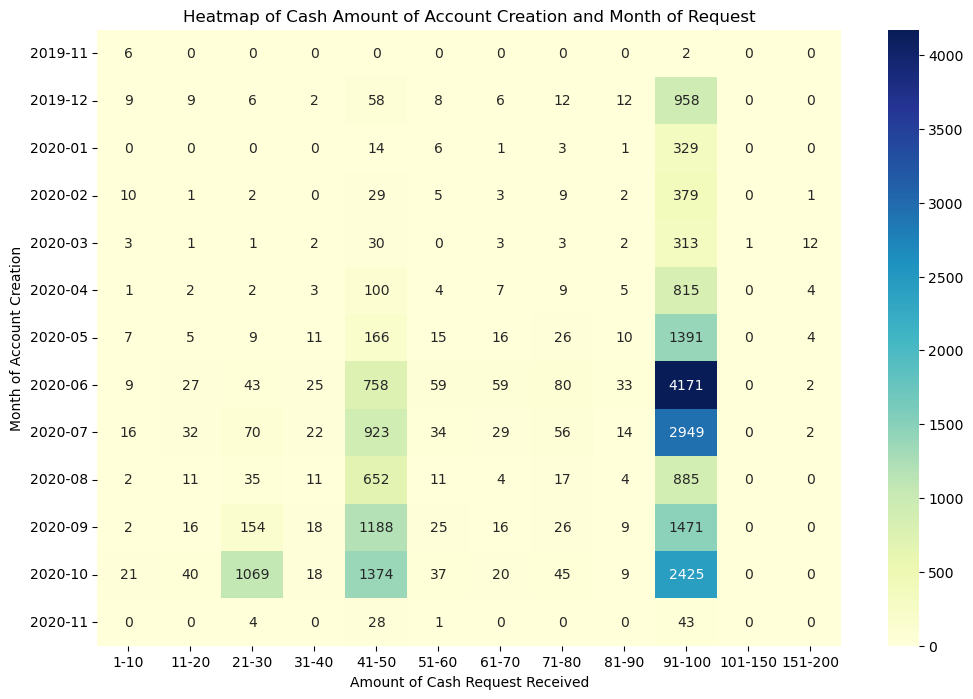

In [150]:
# Define custom bins

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200]

# Define labels for the bins

labels = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', '101-150', '151-200']

# Create a new column for the bin labels

request_df_2['amount_bins'] = pd.cut(request_df_2['amount'], bins=bins, labels=labels)

# Group by month_cohort and cash_request_received_month and count the occurrences

heatmap_data2 = request_df_2.groupby(['cohort_de_verdad', 'amount_bins']).size().unstack(fill_value=0)

# Plot heatmap

plt.figure(figsize=(12, 8))

sns.heatmap(heatmap_data2, annot=True, fmt="d", cmap="YlGnBu")

plt.title('Heatmap of Cash Amount of Account Creation and Month of Request')

plt.xlabel('Amount of Cash Request Received')

plt.ylabel('Month of Account Creation')

plt.show()

In [151]:
#Juntar las dos tablas
result_df = fees_df_2.join(request_df_2.set_index('id'), on='cash_request_id', lsuffix='_left', rsuffix='_right')


In [152]:
#Rellenar los NaNs en la columna de incidentes con "No incidents"
result_df["category"].fillna("No incident", inplace=True)

/tmp/ipykernel_742/1571390070.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  result_df["category"].fillna("No incident", inplace=True)


In [153]:
#Agrupar las merged tables por categoria y cohort
result_df.groupby(["category", "cohort_de_verdad"]).count()

Unnamed: 0_left    id  \
category               cohort_de_verdad                          
No incident            2019-11                        10    10   
                       2019-12                       258   258   
                       2020-01                       116   116   
                       2020-02                       169   169   
                       2020-03                       142   142   
                       2020-04                       394   394   
                       2020-05                       952   952   
                       2020-06                      3723  3723   
                       2020-07                      2859  2859   
                       2020-08                      1270  1270   
                       2020-09                      3025  3025   
                       2020-10                      5876  5876   
                       2020-11                        67    67   
month_delay_on_payment 2019-12                        19    19   
                       2020-01                         6     6   
                       2020-02                         9     9   
                       2020-03                        10    10   
                       2020-04                        49    49   
                       2020-05                        78    78   
                       2020-06                       234   234   
                       2020-07                       171   171   
                       2020-08                        21    21   
rejected_direct_debit  2019-12                        34    34   
                       2020-01                         9     9   
                       2020-02                        15    15   
                       2020-03                        22    22   
                       2020-04                        70    70   
                       2020-05                       156   156   
                       2020-06                       542   542   
                       2020-07                       405   405   
                       2020-08                       128   128   
                       2020-09                       195   195   
                       2020-10                        23    23   

                                         cash_request_id  type  status_left  \
category               cohort_de_verdad                                       
No incident            2019-11                        10    10           10   
                       2019-12                       258   258          258   
                       2020-01                       116   116          116   
                       2020-02                       169   169          169   
                       2020-03                       142   142          142   
                       2020-04                       394   394          394   
                       2020-05                       952   952          952   
                       2020-06                      3723  3723         3723   
                       2020-07                      2859  2859         2859   
                       2020-08                      1270  1270         1270   
                       2020-09                      3025  3025         3025   
                       2020-10                      5876  5876         5876   
                       2020-11                        67    67           67   
month_delay_on_payment 2019-12                        19    19           19   
                       2020-01                         6     6            6   
                       2020-02                         9     9            9   
                       2020-03                        10    10           10   
                       2020-04                        49    49           49   
                       2020-05                        78    78           78   
                       2020-06                       234   234         

In [154]:
#Crear 3 subsets. Uno para cada "incidente"
subset_no_incident = result_df[result_df['category'] == "No incident"]
subset_no_incident.groupby(["cohort_de_verdad"]).count()

subset_rejected_month_delay = result_df[result_df['category'] == "month_delay_on_payment"]
subset_rejected_month_delay.groupby(["cohort_de_verdad"]).count()

subset_rejected_direct_debit = result_df[result_df['category'] == "rejected_direct_debit"]
subset_rejected_direct_debit.groupby(["cohort_de_verdad"]).count()


,Unnamed: 0_left,id,cash_request_id,type,status_left,category,total_amount,reason,created_at_left,updated_at_left,...,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,amount_bins
cohort_de_verdad,,,,,,,,,,,,,,,,,,,,,
2019-12,34,34,34,34,34,34,34,34,34,34,...,2,7,34,24,34,14,34,34,34,34
2020-01,9,9,9,9,9,9,9,9,9,9,...,0,1,9,6,9,2,9,9,9,9
2020-02,15,15,15,15,15,15,15,15,15,15,...,0,4,15,13,15,8,15,15,15,15
2020-03,22,22,22,22,22,22,22,22,22,22,...,3,4,22,16,22,10,22,22,22,22
2020-04,70,70,70,70,70,70,70,70,70,70,...,6,9,70,54,70,23,70,70,70,70
2020-05,156,156,156,156,156,156,156,156,156,156,...,18,26,156,127,156,48,156,156,156,156
2020-06,542,542,542,542,542,542,542,542,542,542,...,65,68,537,408,542,218,541,541,541,542
2020-07,405,405,405,405,405,405,405,405,405,405,...,26,51,403,276,405,259,405,405,405,405
2020-08,128,128,128,128,128,128,128,128,128,128,...,5,18,127,78,128,119,127,127,127,128


In [155]:
result_df.groupby("cohort_de_verdad").count()["id"]

cohort_de_verdad
2019-11      10
2019-12     311
2020-01     131
2020-02     193
2020-03     174
2020-04     513
2020-05    1186
2020-06    4499
2020-07    3435
2020-08    1419
2020-09    3220
2020-10    5899
2020-11      67
Name: id, dtype: int64

In [156]:
#Porcentage de rejected por direct debit por cohort
y1=subset_rejected_direct_debit.groupby(["cohort_de_verdad"]).count()["id"]/result_df.groupby("cohort_de_verdad").count()["id"]*100
#y1.reset_index()

In [157]:
y2=subset_rejected_month_delay.groupby(["cohort_de_verdad"]).count()["id"]/result_df.groupby("cohort_de_verdad").count()["id"]*100
#y2.reset_index()

In [158]:
y2.keys()


Index(['2019-11', '2019-12', '2020-01', '2020-02', '2020-03', '2020-04',
       '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10',
       '2020-11'],
      dtype='object', name='cohort_de_verdad')

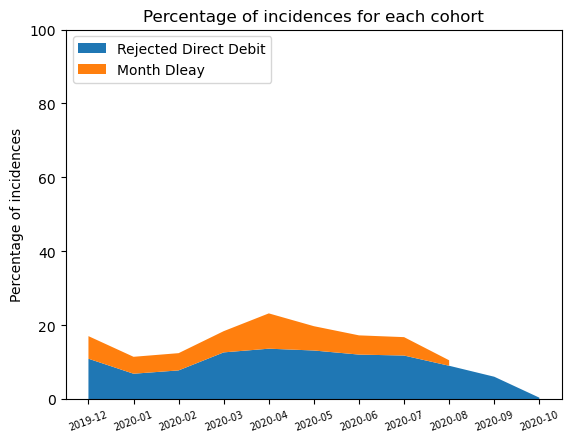

In [159]:
# Basic stacked area chart.
x=['2019-11', '2019-12', '2020-01', '2020-02', '2020-03', '2020-04',
             '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10',
             '2020-11']
plt.stackplot(x,y1,y2, labels=["Rejected Direct Debit", "Month Dleay"])
plt.ylim(0, 100)
plt.title("Percentage of incidences for each cohort")
plt.ylabel("Percentage of incidences")
plt.xticks(fontsize=7, rotation=20)
plt.legend(loc='upper left')


In [160]:
fees_by_cohort=result_df.groupby("cohort_de_verdad")["total_amount"].sum()
fees_by_cohort=fees_by_cohort.reset_index()
fees_by_cohort

,cohort_de_verdad,total_amount
0,2019-11,50.0
1,2019-12,1555.0
2,2020-01,655.0
3,2020-02,965.0
4,2020-03,870.0
5,2020-04,2565.0
6,2020-05,5930.0
7,2020-06,22495.0
8,2020-07,17175.0
9,2020-08,7095.0


In [161]:
fees_by_cohort["total_amount"]

0        50.0
1      1555.0
2       655.0
3       965.0
4       870.0
5      2565.0
6      5930.0
7     22495.0
8     17175.0
9      7095.0
10    16100.0
11    29500.0
12      335.0
Name: total_amount, dtype: float64

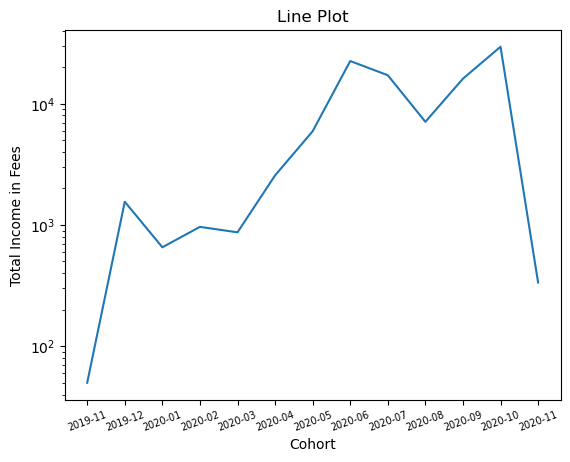

In [162]:
#Haciendo un graficos de linea para ver la evolucion de cobro de fees
# Convert Period objects to strings
x_values = fees_by_cohort['cohort_de_verdad'].astype(str).values
y_values = fees_by_cohort['total_amount'].values

# Plotting the line plot
plt.plot(x_values, y_values)

# Adding labels and title
plt.xlabel('Cohort')
plt.ylabel('Total Income in Fees')
plt.title('Line Plot')
plt.xticks(fontsize=7, rotation=20)

plt.yscale('log')


# Displaying the plot
plt.show()


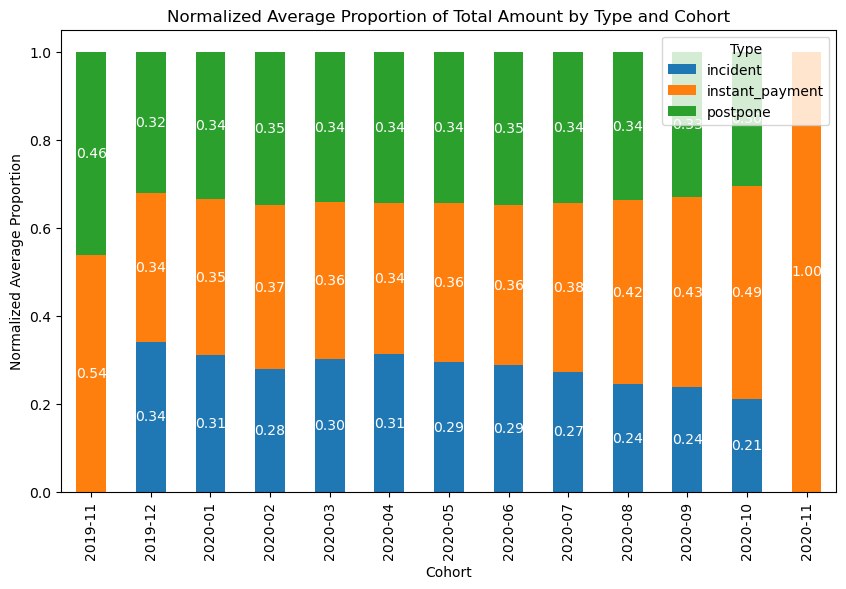

In [189]:
#Quiero visualizar la proporcion de los fees generados por cada tipo/cada cohorte

#Primero agrupo por por cohorte, id y tipo y sumo el total amount
grouped = result_df.groupby(['cohort_de_verdad', 'cash_request_id', 'type'])['total_amount'].sum()

#Para hacer la proporcion, voy a necesitar la cantidad total de fees generados por cada cohorte, independientemente del tipo de fee
total_amount_per_id = grouped.groupby(['cohort_de_verdad', 'cash_request_id']).sum()

#Hago la proporcion y lo transformo en DataFrame
proportions = grouped / total_amount_per_id
proportions_df = proportions.reset_index(name='proportion')

# Calculo la media
average_proportions = proportions_df.groupby(['cohort_de_verdad', 'type'])['proportion'].mean().unstack(fill_value=0)

# Normalizo para que cada bar sea igual a 1
average_proportions = average_proportions.div(average_proportions.sum(axis=1), axis=0)

# Plot
ax = average_proportions.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Normalized Average Proportion of Total Amount by Type and Cohort')
plt.xlabel('Cohort')
plt.ylabel('Normalized Average Proportion')
plt.legend(title='Type')

# Annotate
for i in range(len(average_proportions)):
    for j in range(len(average_proportions.columns)):
        value = average_proportions.iloc[i, j]
        if value > 0:  # Only annotate non-zero values
            ax.text(i, sum(average_proportions.iloc[i, :j+1]) - value/2, f'{value:.2f}', ha='center', va='center', color='white')

plt.show()